# Make histogramms for any quantities

- author Sylvie Dagoret-Campagne
- date October 18th 2018

In [201]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [202]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [203]:
import datetime as dt

In [204]:
YEARSTR="2018"
YEARNUM=int(YEARSTR)

In [205]:
VAR_name='TOTANGSTR'
VAR_title='Angstrom Parameter'
VAR_unit='@470-870nm'
VAR_min=0
VAR_max=2

In [206]:
#VAR_name='TOTEXTTAU'
#VAR_title='Extinction'
#VAR_unit='@550nm'
#VAR_min=0
#VAR_max=0.5

In [207]:
yearfile='MERRA2_'+YEARSTR+'_tavg1_2d_aer_Nx_M2T1NXAER_ohp_AllYear.csv'

In [208]:
df_year=pd.read_csv(yearfile)

In [209]:
df_year.head()

,time,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0,2018-01-01 00:30:00,1.205786,0.139384,0.133389
1,2018-01-01 01:30:00,1.031252,0.114049,0.109637
2,2018-01-01 02:30:00,0.825740,0.066395,0.063274
3,2018-01-01 03:30:00,0.762376,0.051468,0.048648
4,2018-01-01 04:30:00,0.734917,0.046664,0.043992


## Per year

In [210]:
df_year.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,5832.000000,5832.000000,5832.000000
mean,1.128746,0.153050,0.143445
std,0.318880,0.099422,0.094825
min,-0.009832,0.022592,0.020269
25%,0.950254,0.084343,0.077671
50%,1.166563,0.133240,0.124189
75%,1.343829,0.193190,0.181969
max,1.908842,1.013607,0.938630


In [211]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0.05,0.495910,0.038845,0.034788
0.10,0.705795,0.049257,0.045173
0.50,1.166563,0.133240,0.124189
0.90,1.491219,0.270939,0.256911
0.95,1.595506,0.346707,0.329084


In [212]:
var_year=df_year[VAR_name]

In [213]:
var_year.replace(to_replace=0, value=np.nan)

0       1.205786
1       1.031252
2       0.825740
3       0.762376
4       0.734917
5       0.688781
6       0.676890
7       0.704760
8       0.707022
9       0.732250
10      0.797715
11      0.786483
12      0.819494
13      0.798818
14      0.662142
15      0.549267
16      0.482428
17      0.445080
18      0.662040
19      0.704887
20      0.733314
21      0.812675
22      0.889223
23      0.887320
24      0.895236
25      0.935540
26      0.952272
27      0.971309
28      0.999591
29      0.994945
          ...   
5802    1.828820
5803    1.815285
5804    1.775715
5805    1.764460
5806    1.756479
5807    1.760312
5808    1.732472
5809    1.675491
5810    1.618028
5811    1.598686
5812    1.611000
5813    1.643421
5814    1.730119
5815    1.766822
5816    1.782811
5817    1.733001
5818    1.737421
5819    1.737540
5820    1.656573
5821    1.658972
5822    1.671181
5823    1.680073
5824    1.693400
5825    1.708199
5826    1.724645
5827    1.735246
5828    1.742298
5829    1.7544

In [214]:
mean_var_y = np.mean(var_year)
variance_var_y = np.var(var_year)
sigma_var_y = np.sqrt(variance_var_y)

In [215]:
mean_var_y=np.trunc(mean_var_y*1000)/1000
sigma_var_y=np.trunc(sigma_var_y*1000)/1000

In [216]:
title = "Yearly variation of {} (year {}), mean = {} std = {}".format(VAR_title,YEARSTR,mean_var_y ,sigma_var_y)

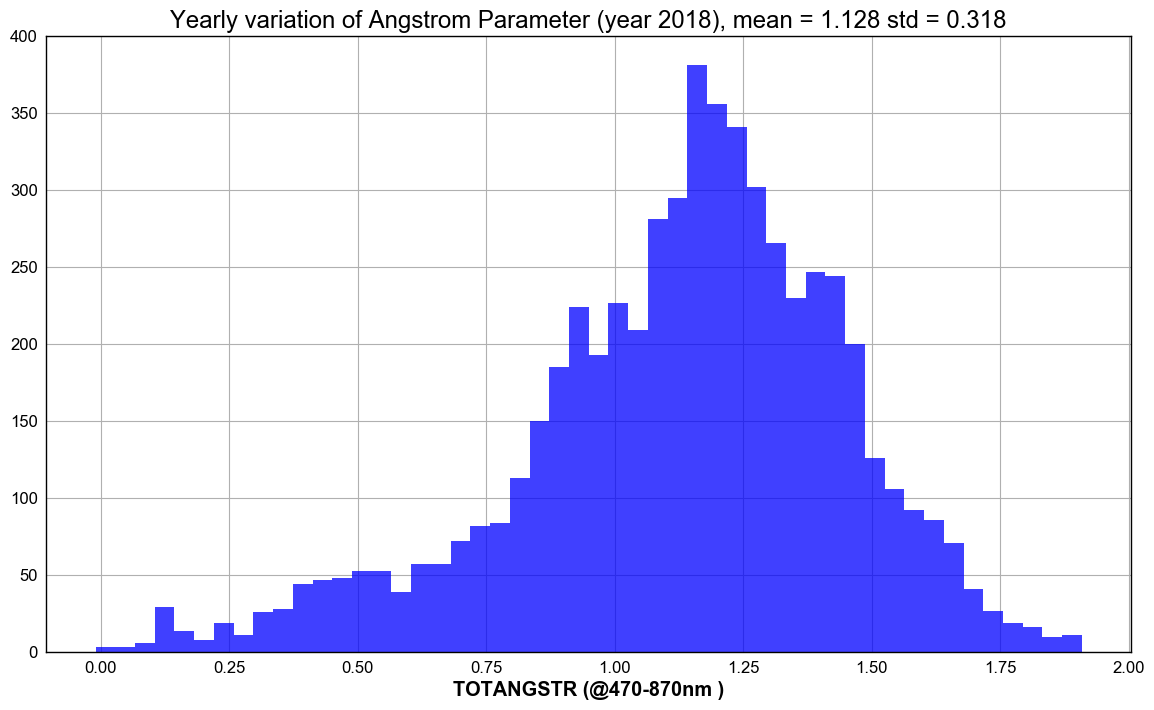

In [217]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_allyear.jpg'
plt.savefig(figfilename)

# Selection of a period

In [218]:
all_datetime=pd.to_datetime(df_year['time'].get_values())

In [219]:
all_datetime

DatetimeIndex(['2018-01-01 00:30:00', '2018-01-01 01:30:00',
               '2018-01-01 02:30:00', '2018-01-01 03:30:00',
               '2018-01-01 04:30:00', '2018-01-01 05:30:00',
               '2018-01-01 06:30:00', '2018-01-01 07:30:00',
               '2018-01-01 08:30:00', '2018-01-01 09:30:00',
               ...
               '2018-08-31 14:30:00', '2018-08-31 15:30:00',
               '2018-08-31 16:30:00', '2018-08-31 17:30:00',
               '2018-08-31 18:30:00', '2018-08-31 19:30:00',
               '2018-08-31 20:30:00', '2018-08-31 21:30:00',
               '2018-08-31 22:30:00', '2018-08-31 23:30:00'],
              dtype='datetime64[ns]', length=5832, freq=None)

In [220]:
winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))

In [221]:
summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))

In [222]:
var_winter=var_year.get_values()[winter_time_index]
var_summer=var_year.get_values()[summer_time_index]

In [223]:
mean_var_winter = np.mean(var_winter)
variance_var_winter = np.var(var_winter)
sigma_var_winter = np.std(var_winter)

In [224]:
mean_var_summer = np.mean(var_summer)
variance_var_summer = np.var(var_summer)
sigma_var_summer = np.std(var_summer)

In [225]:
mw=np.trunc(mean_var_winter*100)/100
sw=np.trunc(sigma_var_winter*100)/100

ms=np.trunc(mean_var_summer*100)/100
ss=np.trunc(sigma_var_summer*100)/100

In [226]:
title = "Yearly variation of {}({}) (year {}), summer : {} +/- {}, winter : {} +/- {}".format(VAR_title,VAR_unit,YEARSTR,ms,ss,mw,sw)

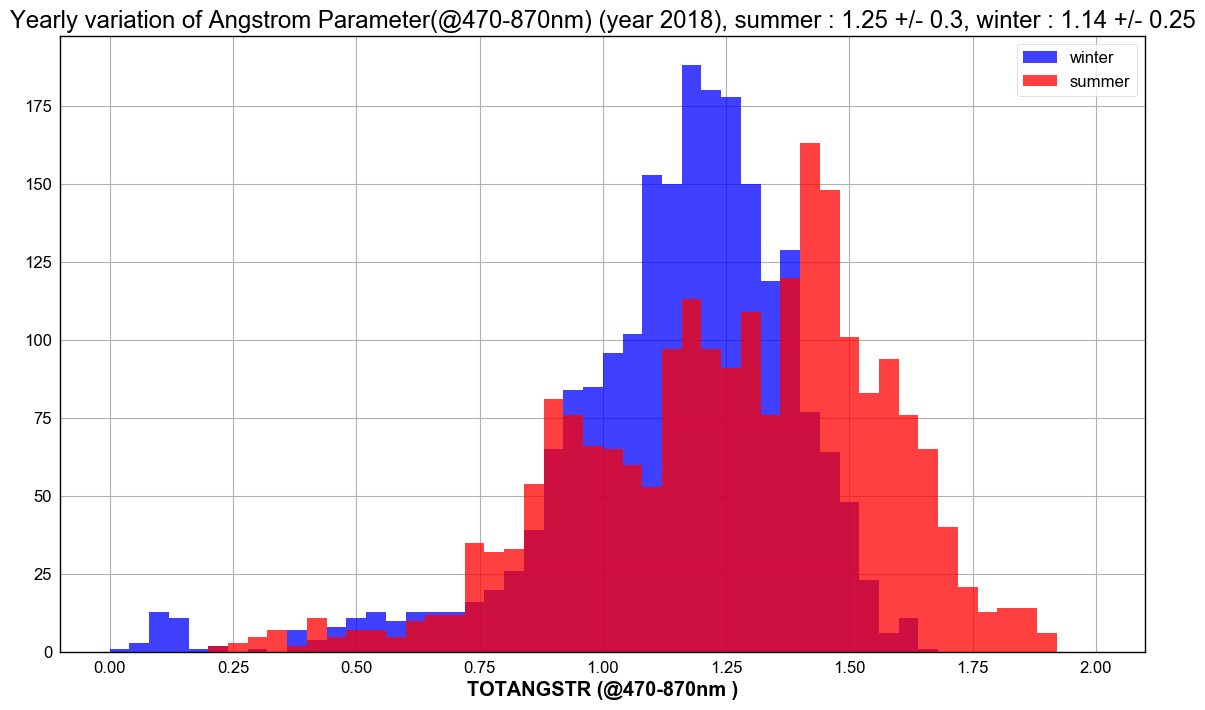

In [227]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_winter, 50, range=(VAR_min,VAR_max),normed=False, facecolor='blue', alpha=0.75,label='winter')
n, bins, patches = plt.hist(var_summer, 50, range=(VAR_min,VAR_max),normed=False, facecolor='red', alpha=0.75,label='summer')
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_WinterSummer.jpg'
plt.legend()
plt.savefig(figfilename)